In [2]:
%%capture
%matplotlib notebook

try:
    from importlib import reload
except ImportError:
    # assume this is python2
    pass
    
import parse_perf as pf
import parse_log as pl
import parse_nvvp as pn
import plotutils as pu
import pandas as pd
import matplotlib.pyplot as plt

for m in [pf, pl, pu, pn]:
    reload(m)

In [68]:
perfdf = pf.load_file('/gpfs/gpfs0/groups/chowdhury/peifeng/buildbed/executor/tests/new_ratio_test_wait10s_iter200_alex1016_fair_gpu_diffcnt_fixlog_fixdur_inc/perffilter.output')

<IPython.core.display.Javascript object>


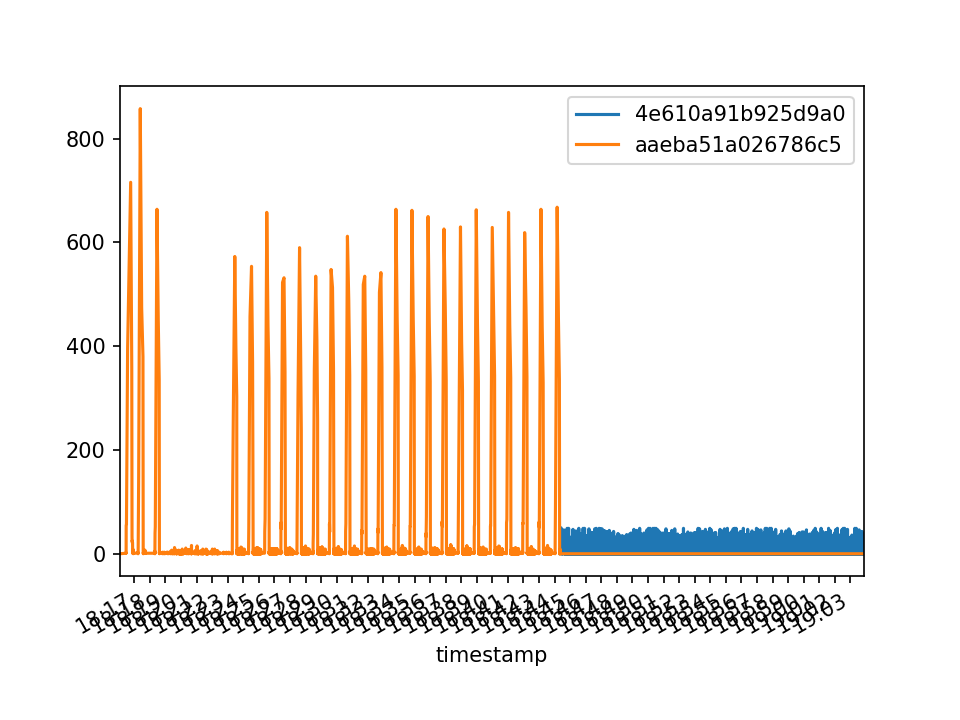

In [69]:
def scheduled_counter(df, beginning=None):
    df = df[df['type'] == 'sess-iter'].drop('type', axis=1)
    for col in ['pending', 'scheduled', 'counter']:
        df[col] = pd.to_numeric(df[col])

    useTimedelta = beginning is not None

    fig, ax = plt.subplots()
    for key, grp in df.groupby(['sess']):
        if useTimedelta:
            grp.index = grp.index - beginning
            grp.index = grp.index.astype(int)

        ax = grp.plot(ax=ax, kind='line', y='scheduled', label=key)

    if useTimedelta:
        pu.cleanup_axis_timedelta(ax.xaxis)
    else:
        pu.cleanup_axis_datetime(ax.xaxis)

    return df, fig

_ = scheduled_counter(perfdf[:100000])

<IPython.core.display.Javascript object>


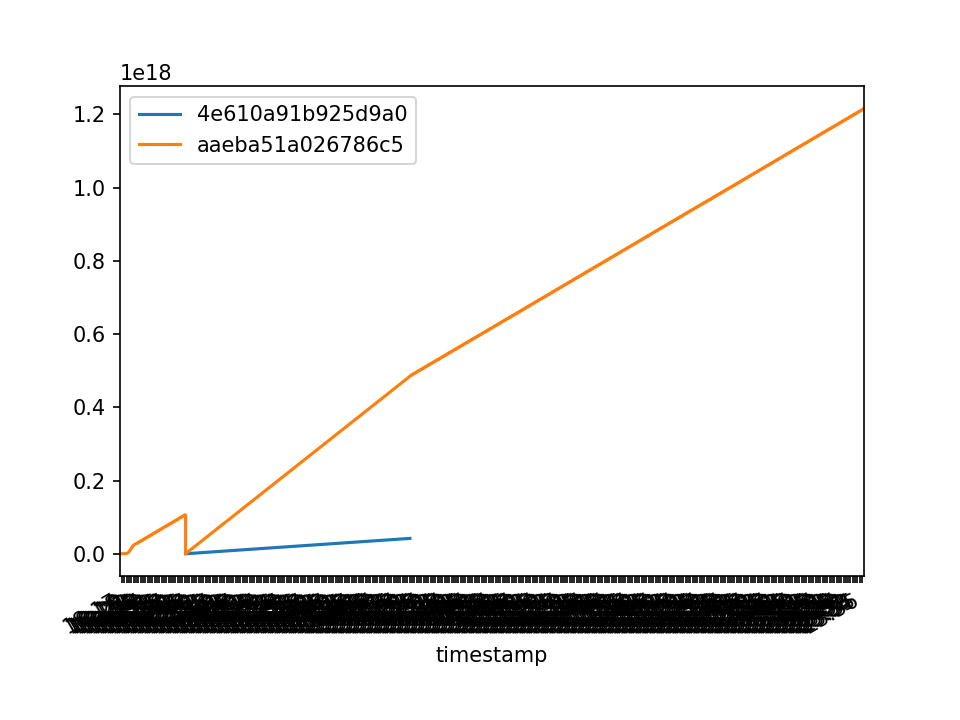

In [70]:
#df = pf.load_file('/gpfs/gpfs0/groups/chowdhury/peifeng/buildbed/executor/tests/new_ratio_test_wait10s_iter400_alex1016_fair/perffilter.output')
perfdfprog, fig = pf.progress_counter(perfdf)

<IPython.core.display.Javascript object>


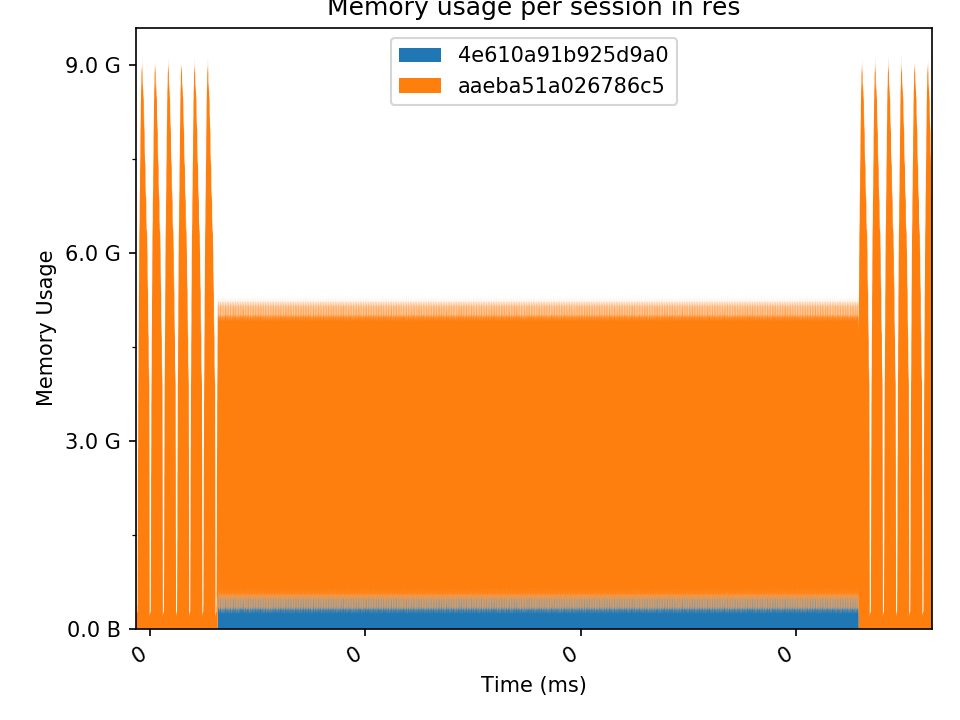

In [71]:
logs = pl.load_file('/gpfs/gpfs0/groups/chowdhury/peifeng/buildbed/executor/tests/new_ratio_test_wait10s_iter200_alex1016_fair_gpu_diffcnt_fixlog_fixdur_inc/head.output')
df, series, fig = pl.memory_usage(logs, mem_type='GPU_0_bfc', per_sess=True)
fig.axes[-1].set_title('Memory usage per session in res')

In [60]:
df.session.unique()

array(['d68a4e4d41e346dc', '31e903e94e7d36c1'], dtype=object)

<IPython.core.display.Javascript object>


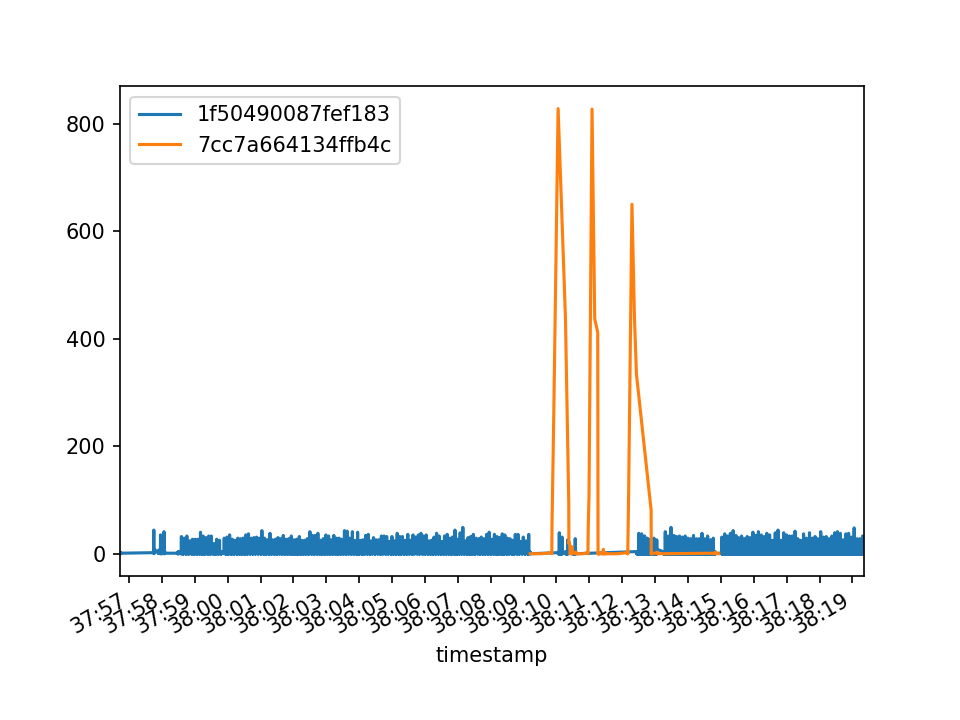

In [42]:
def scheduled_counter(df, beginning=None):
    df = df[df['type'] == 'sess-iter'].drop('type', axis=1)
    for col in ['pending', 'scheduled', 'counter']:
        df[col] = pd.to_numeric(df[col])

    useTimedelta = beginning is not None

    fig, axs = plt.subplots(nrows=len(df['sess'].unique(), sharex=True)
    for (key, grp), ax in zip(df.groupby(['sess']), axs):
        if useTimedelta:
            grp.index = grp.index - beginning
            grp.index = grp.index.astype(int)

        ax = grp.plot(ax=ax, kind='line', y='scheduled', label=key)

    if useTimedelta:
        pu.cleanup_axis_timedelta(ax.xaxis)
    else:
        pu.cleanup_axis_datetime(ax.xaxis)

    return df, fig

_ = scheduled_counter(perfdf[:100000])

<IPython.core.display.Javascript object>


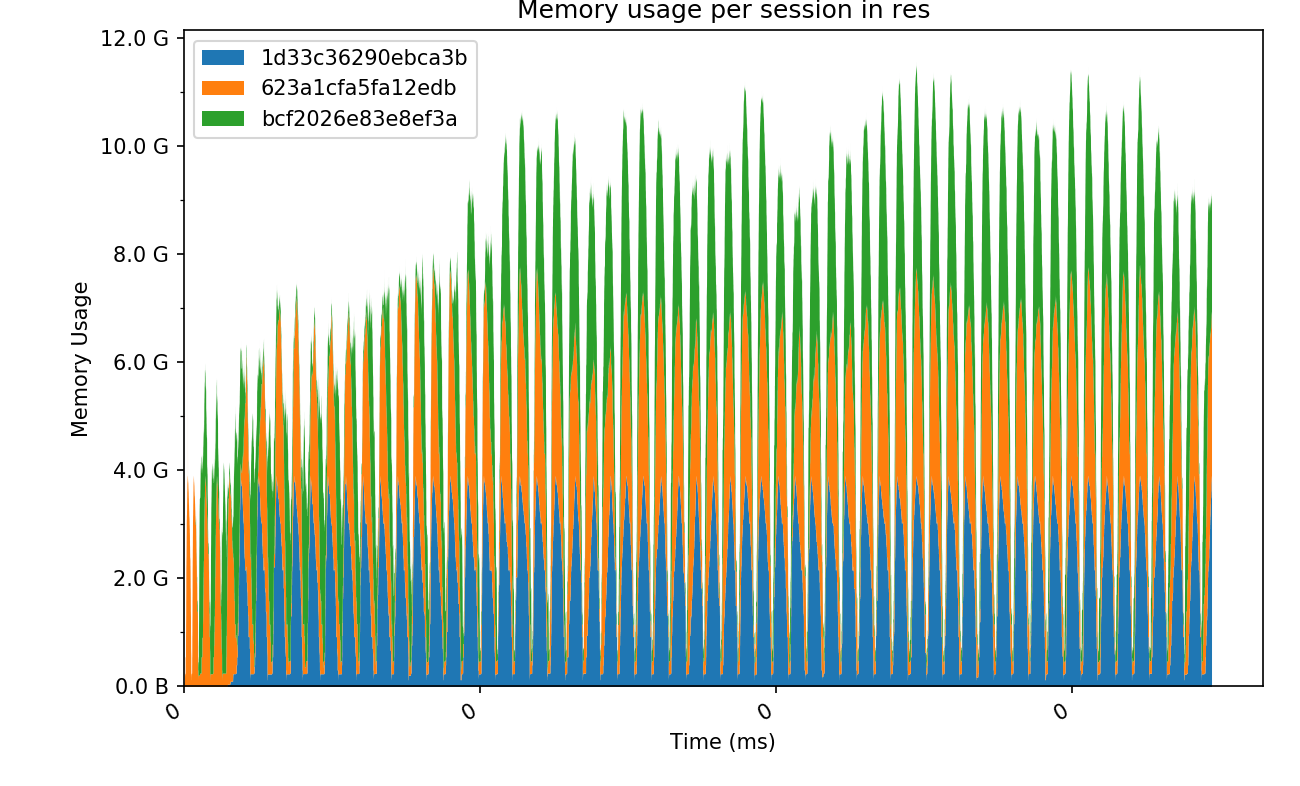

In [34]:
logs = pl.load_file('logs/area_3res_sleep5_1min_nocpu_perf/head.output')
df, series, fig = pl.memory_usage(logs, mem_type='GPU_0_bfc', per_sess=True)
fig.axes[-1].set_title('Memory usage per session in res')

<IPython.core.display.Javascript object>


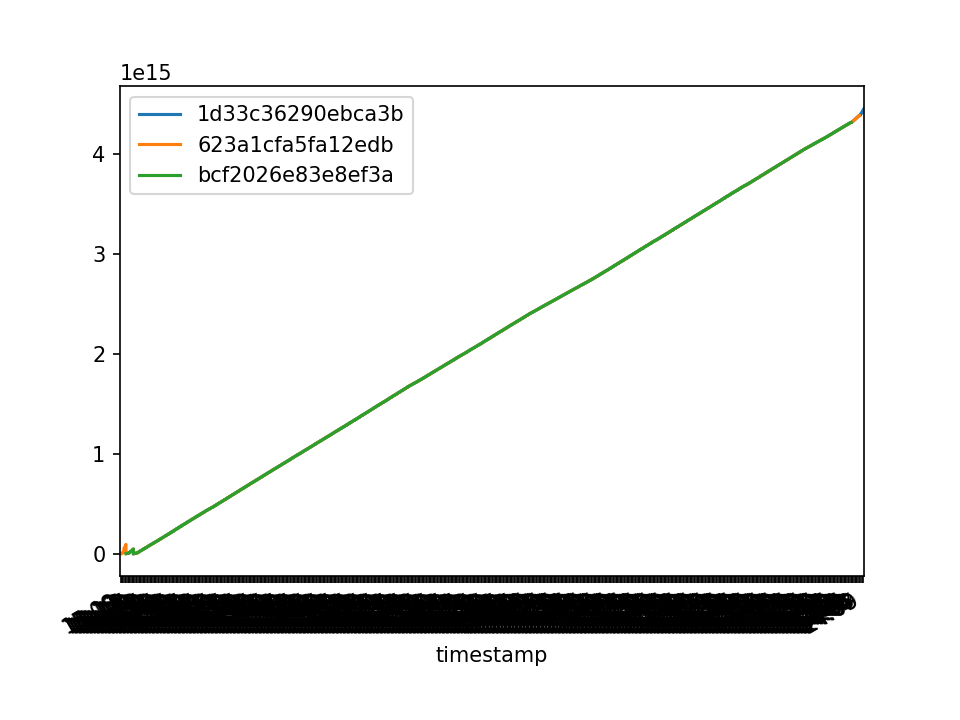

In [36]:
#df = pf.load_file('logs/area_3res_sleep5_1min_nocpu_perf/perffilter.output')
perfdfprog, fig = pf.progress_counter(df)

In [11]:
df = pd.DataFrame(logs)

In [60]:
sss = pd.DataFrame({'int': col_int, 'td': col_timedelta, 'float': col_float})

<IPython.core.display.Javascript object>


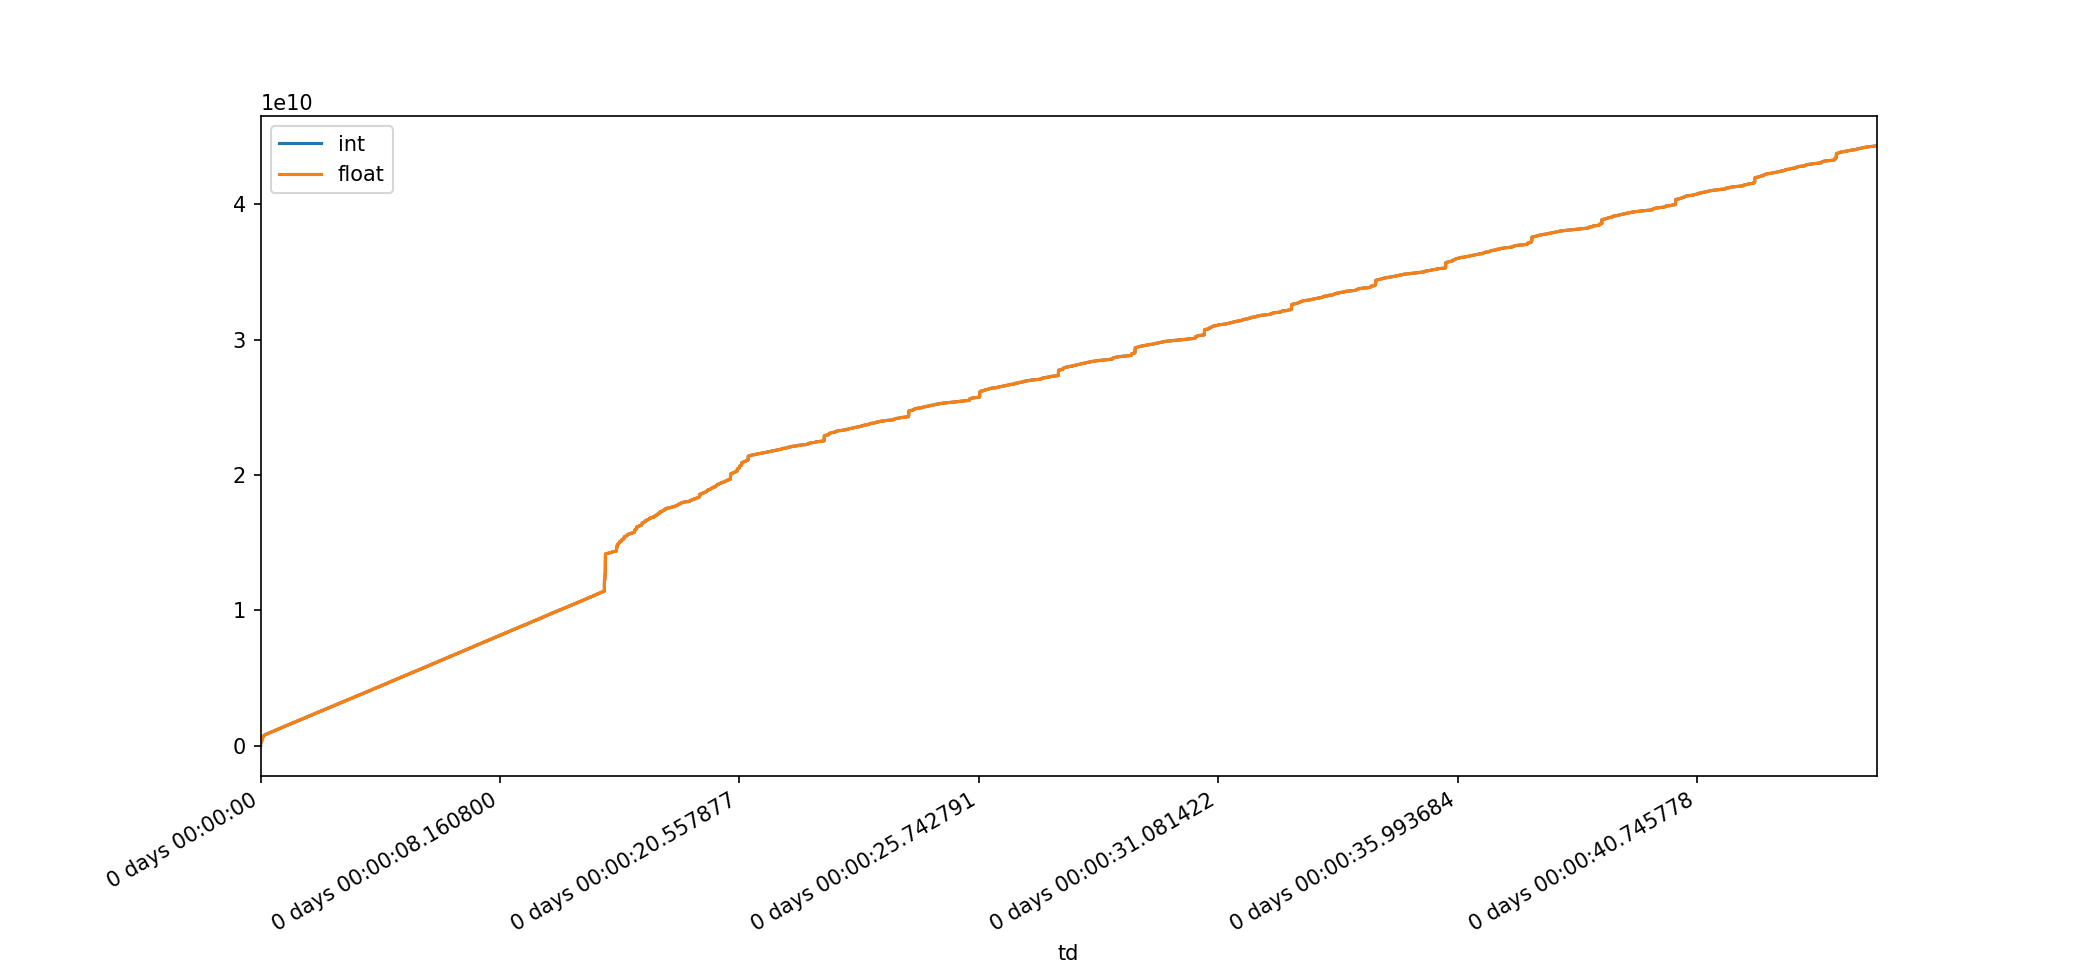

In [61]:
sss.plot(x='td', y=['int', 'float'])

In [62]:
pd.Timedelta(seconds=20.557887) / pd.Timedelta(nanoseconds=1)

20557887000.0

<IPython.core.display.Javascript object>


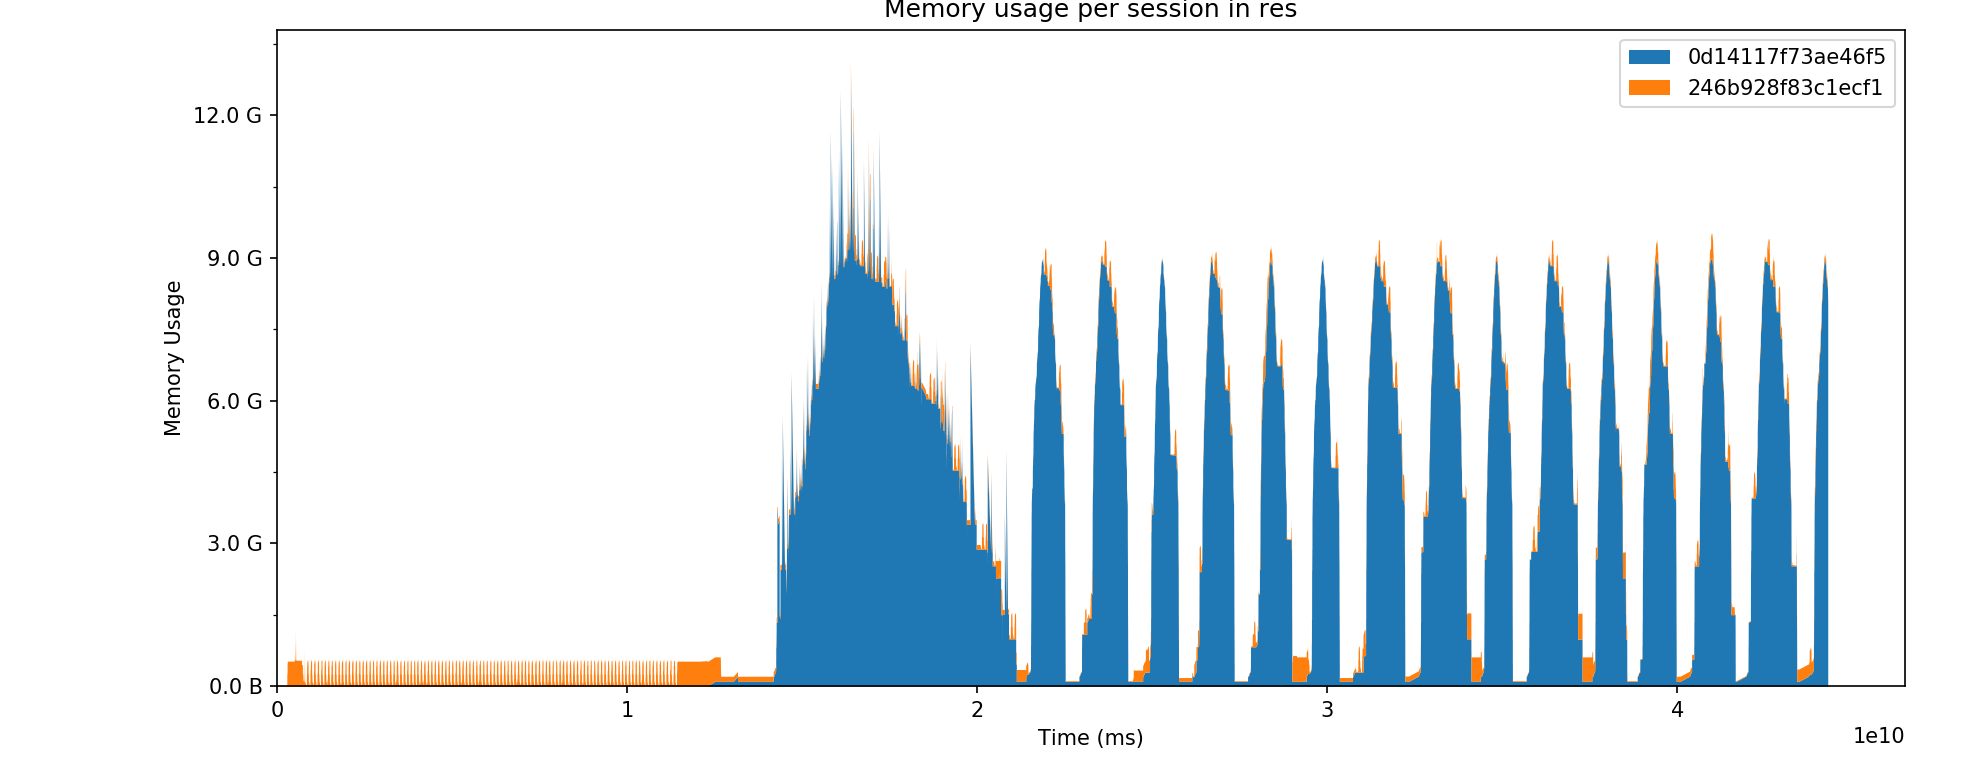

In [48]:
logs = pl.load_file('/gpfs/gpfs0/groups/chowdhury/peifeng/buildbed/executor/tests/new_ratio_test_wait10s_iter400_alex1016_fair/head.output')
df, beginning, series, fig = pl.memory_usage(logs, mem_type='GPU_0_bfc', per_sess=True)
fig.axes[-1].set_title('Memory usage per session in res')

In [25]:
idx = (df.index - beginning)
idx

TimedeltaIndex([       '00:00:00', '00:00:00.150944', '00:00:00.151035',
                '00:00:00.170853', '00:00:00.175347', '00:00:00.176985',
                '00:00:00.178208', '00:00:00.196410', '00:00:00.198071',
                '00:00:00.274864',
                ...
                '00:00:44.294339', '00:00:44.294353', '00:00:44.294367',
                '00:00:44.294487', '00:00:44.294500', '00:00:44.294530',
                '00:00:44.294580', '00:00:44.294631', '00:00:44.294660',
                '00:00:44.294724'],
               dtype='timedelta64[ns]', name=u'timestamp', length=134985, freq=None)

<IPython.core.display.Javascript object>


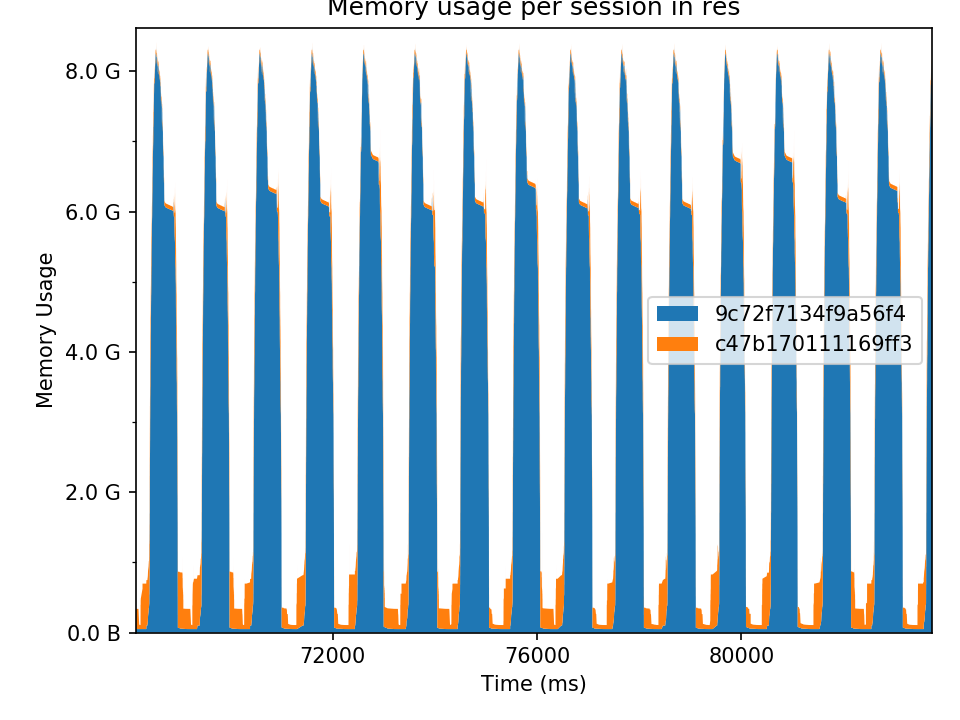

In [5]:
logs = pl.load_file('/gpfs/gpfs0/groups/chowdhury/yiwenzhg/buildbed/executor/tests/area_logs/area_mix_try2/alloc.output')
df, _, fig = pl.memory_usage(logs, mem_type='GPU_0_bfc', per_sess=True)
fig.axes[-1].set_title('Memory usage per session in res')

<IPython.core.display.Javascript object>


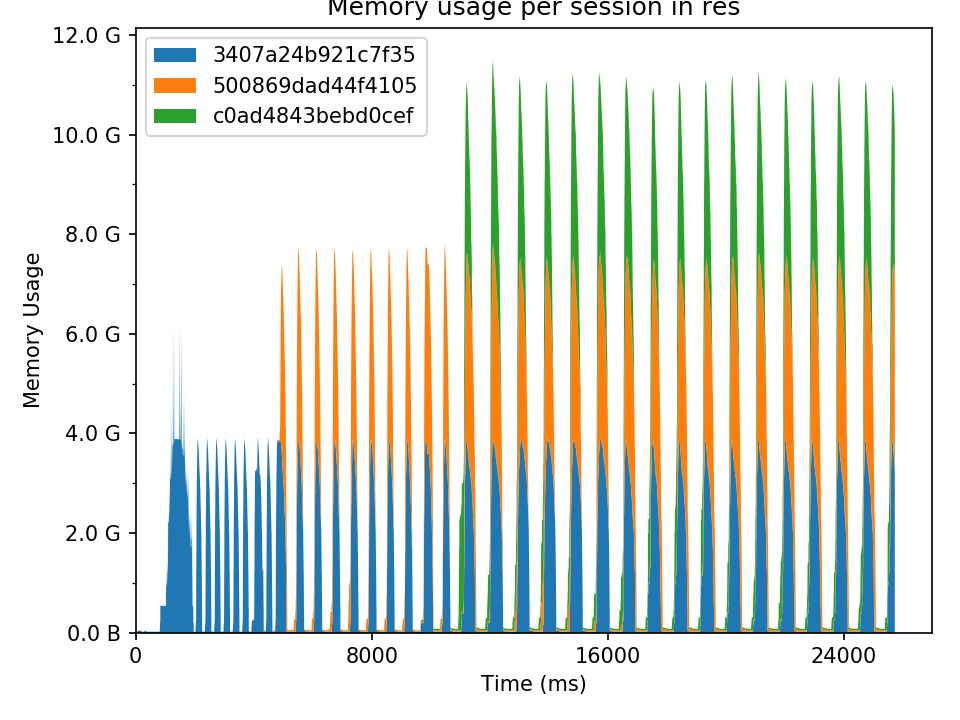

In [2]:
logs = pl.load_file('logs/area_3res_sleep5_10min/part01.output')
df, _, fig = pl.memory_usage(logs, mem_type='GPU_0_bfc', per_sess=True)
fig.axes[-1].set_title('Memory usage per session in res')

<IPython.core.display.Javascript object>


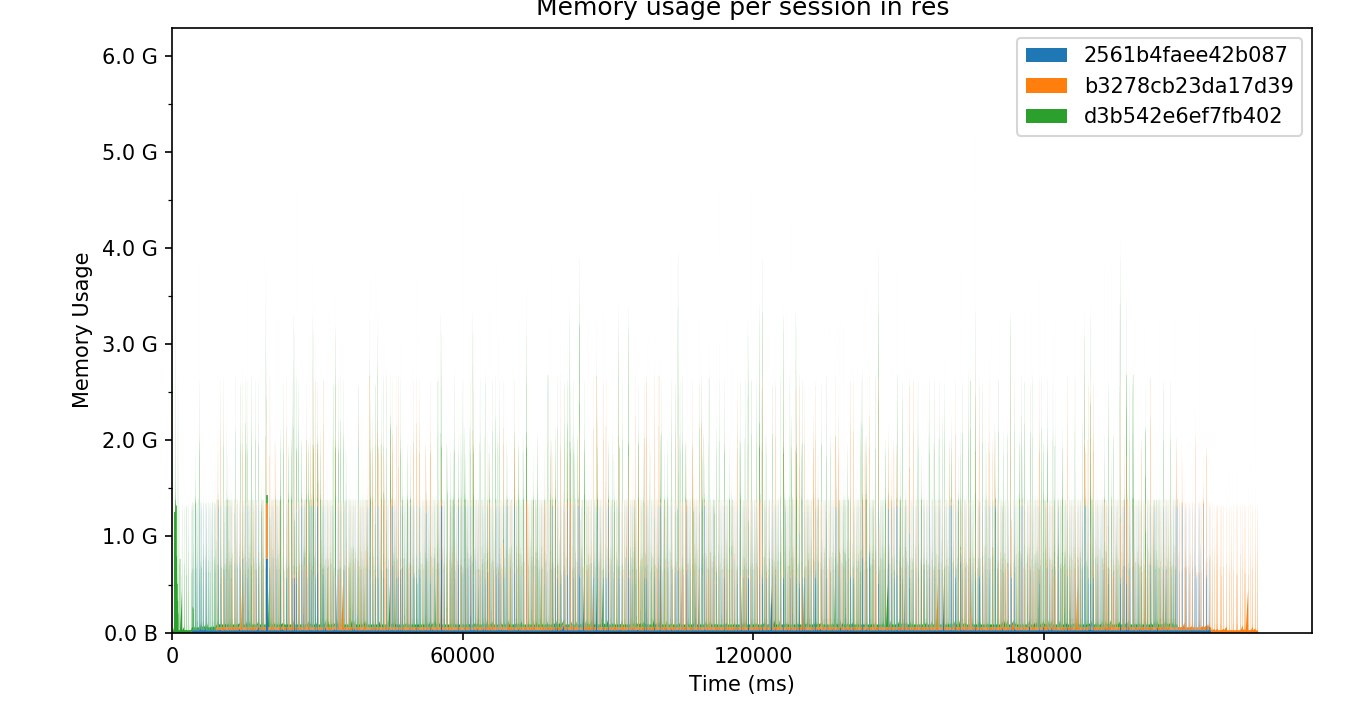

In [3]:
logs = pl.load_file('logs/area_3of_sleep5_rand/alloc.output')
df, _, fig = pl.memory_usage(logs, mem_type='GPU_0_bfc', per_sess=True)
fig.axes[-1].set_title('Memory usage per session in res')

<IPython.core.display.Javascript object>


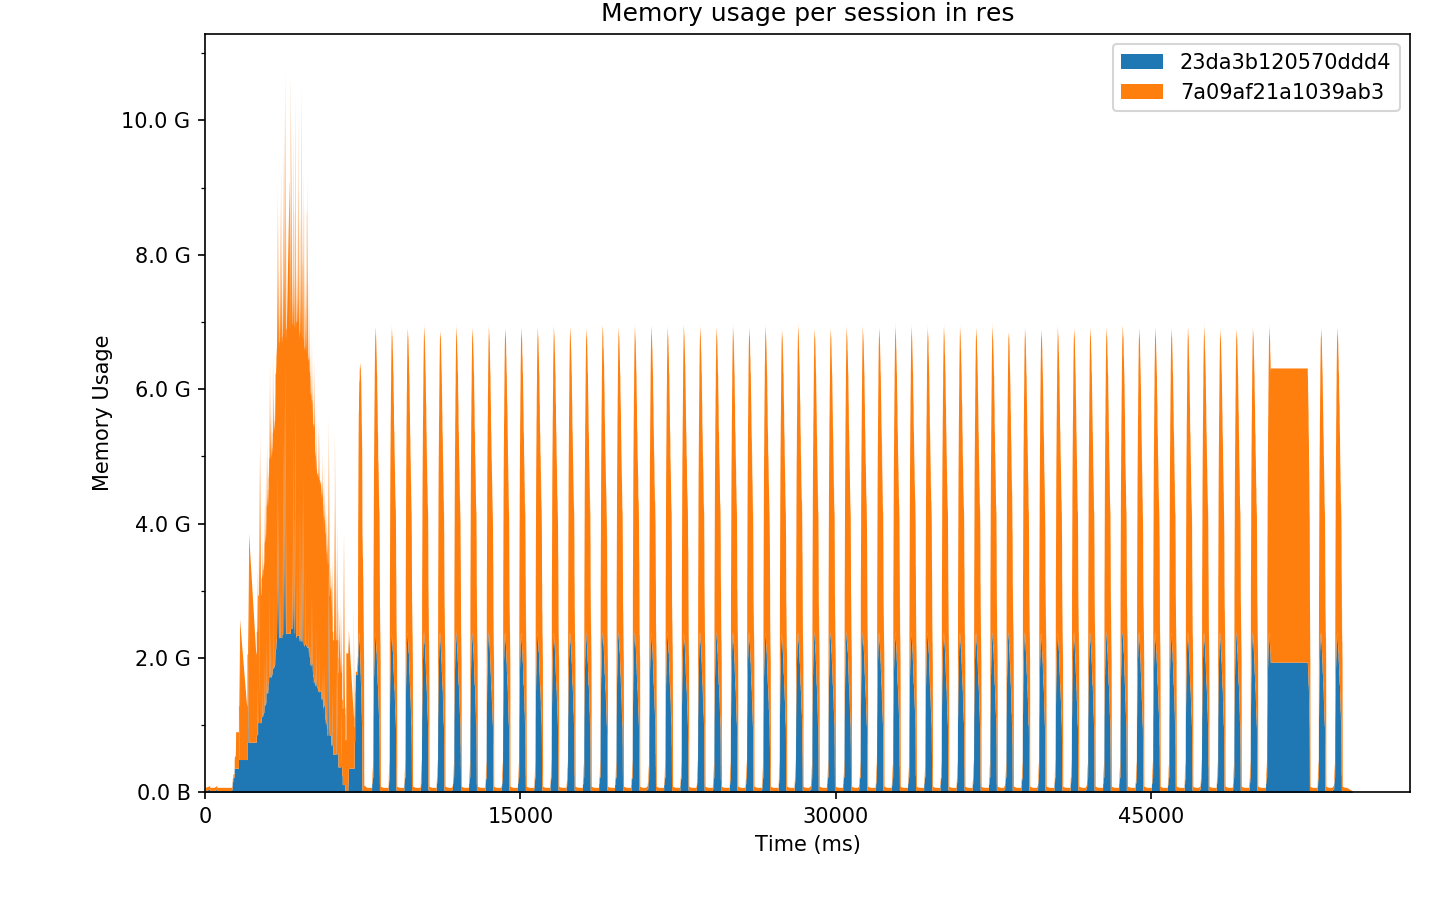

In [4]:
logs = pl.load_file('/gpfs/gpfs0/groups/chowdhury/yiwenzhg/buildbed/executor/tests/area_logs/area_incep_try2/alloc_try2_nofair.output')
df, _, fig = pl.memory_usage(logs, mem_type='GPU_0_bfc', per_sess=True)
fig.axes[-1].set_title('Memory usage per session in res')

<IPython.core.display.Javascript object>


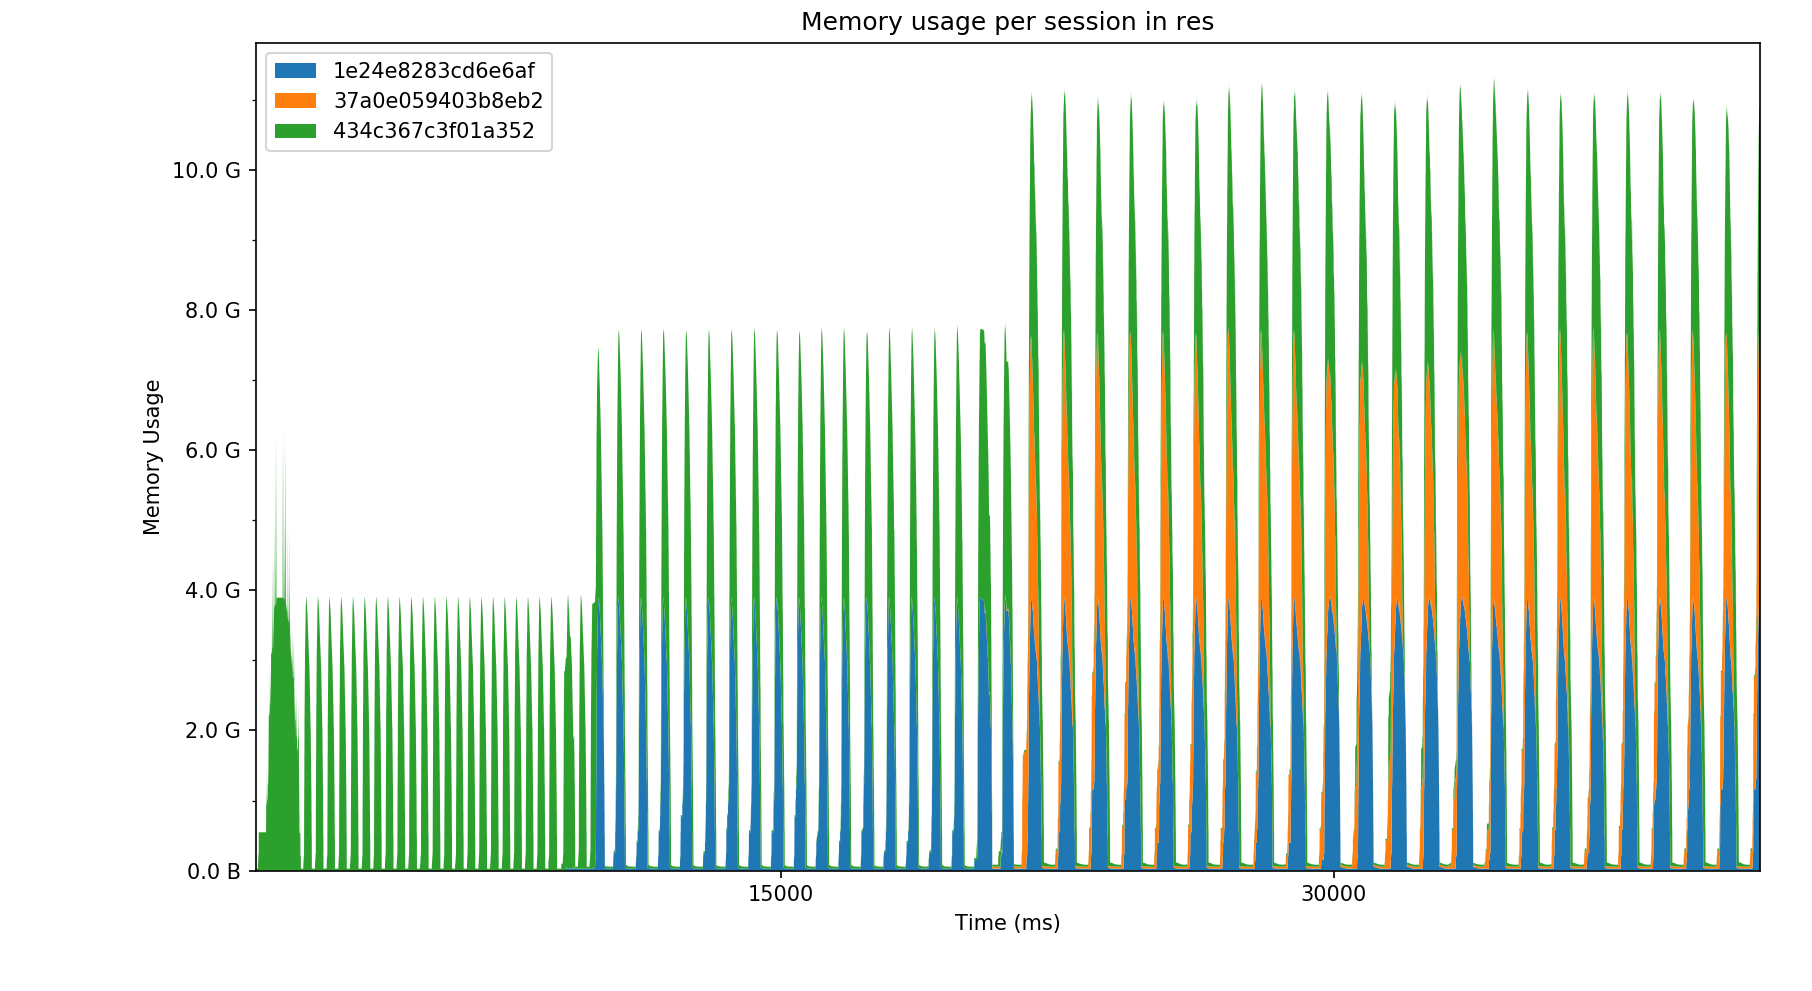

In [7]:
logs = pl.load_file('logs/area_3res_sleep10/alloc.output')
df, _, fig = pl.memory_usage(logs, mem_type='GPU_0_bfc', per_sess=True)
fig.axes[-1].set_title('Memory usage per session in res')

Progress counter for mnist50+vgg100

* `1f9a...` (blue): mnist50
* `7a5f...` (orange): vgg100

<IPython.core.display.Javascript object>


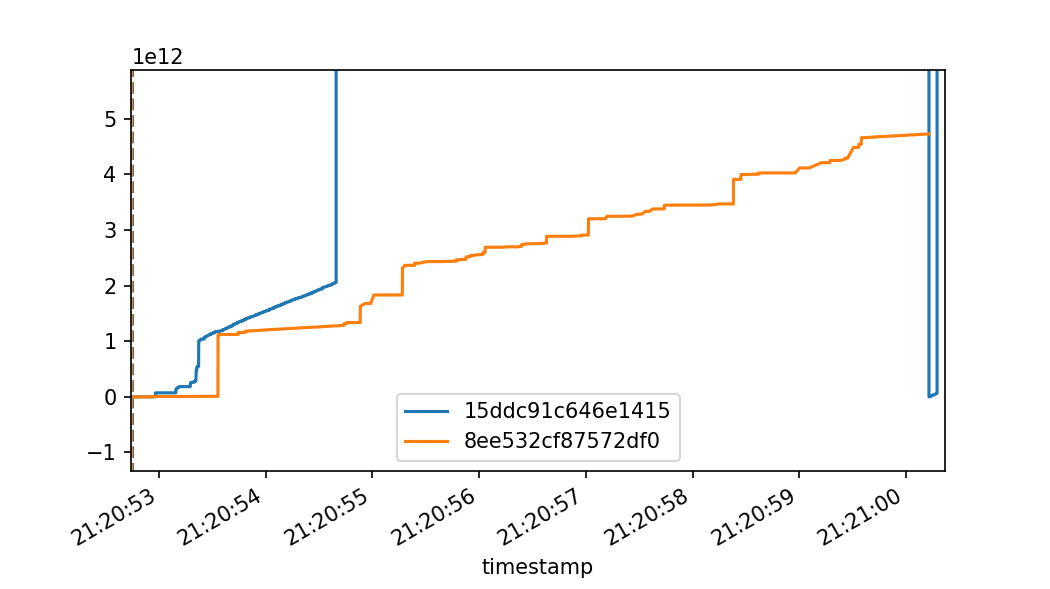

In [6]:
#Load the log file and plot progress counter per session
logs = pl.load_file('logs/mem/mnist50+vgg100/progcounter/progresscounter.output')

df, fig = pl.progress_counter(logs)

Progress counter for 2vgg100

<IPython.core.display.Javascript object>


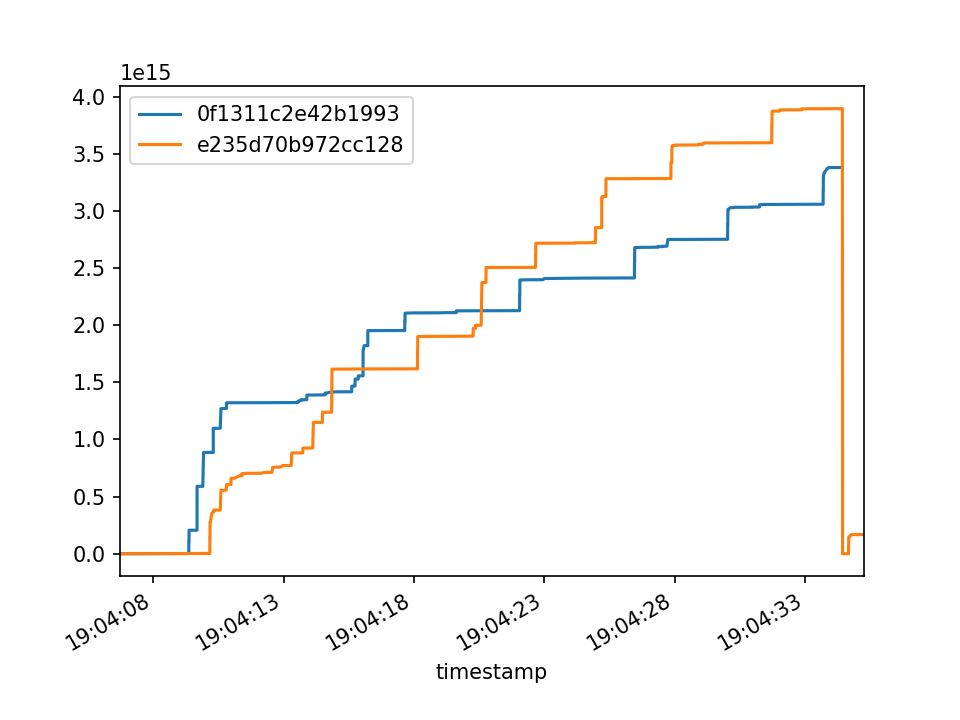

In [29]:
#Load the log file and plot progress counter per session
logs = pl.load_file('logs/progcnt/2vgg100/progresscounter.output')
data = [{'session': l.sess, 'counter': l.cnt, 'timestamp': l.timestamp} for l in logs if l.type == 'prog_cnt']
df = pd.DataFrame(data)
fig, ax = plt.subplots()
for key, grp in df.groupby(['session']):
    ax = grp.plot(ax=ax, kind='line', x='timestamp', y='counter', label=key)

Progress counter for mix6

<IPython.core.display.Javascript object>


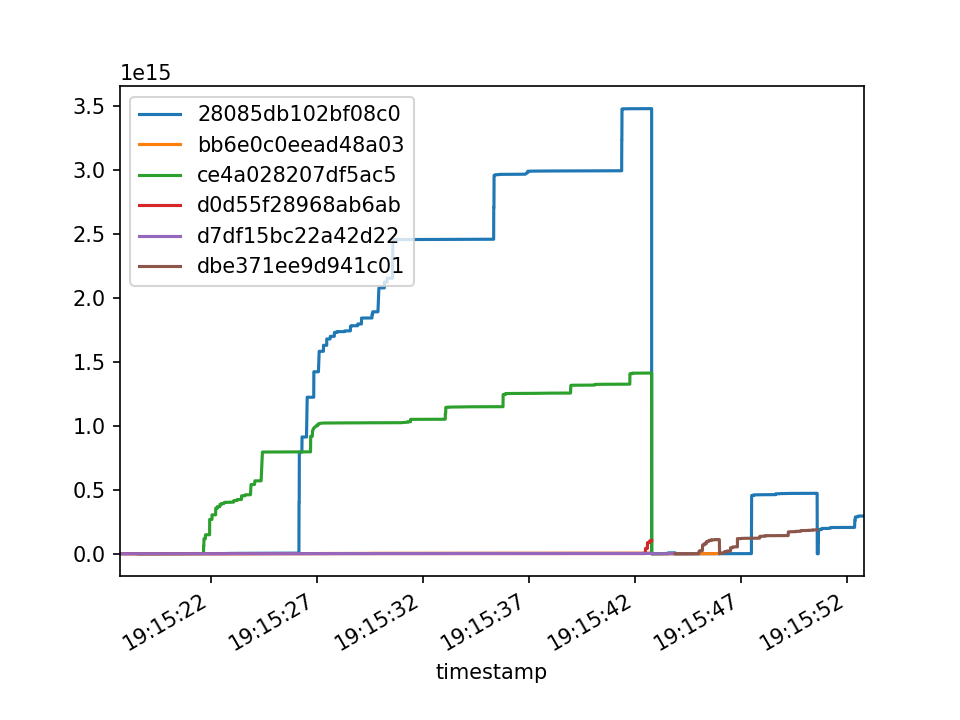

In [30]:
#Load the log file and plot progress counter per session
logs = pl.load_file('logs/mem/mix6/progresscounter.output')

df, fig = pl.progress_counter(logs)